In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
import wrangle

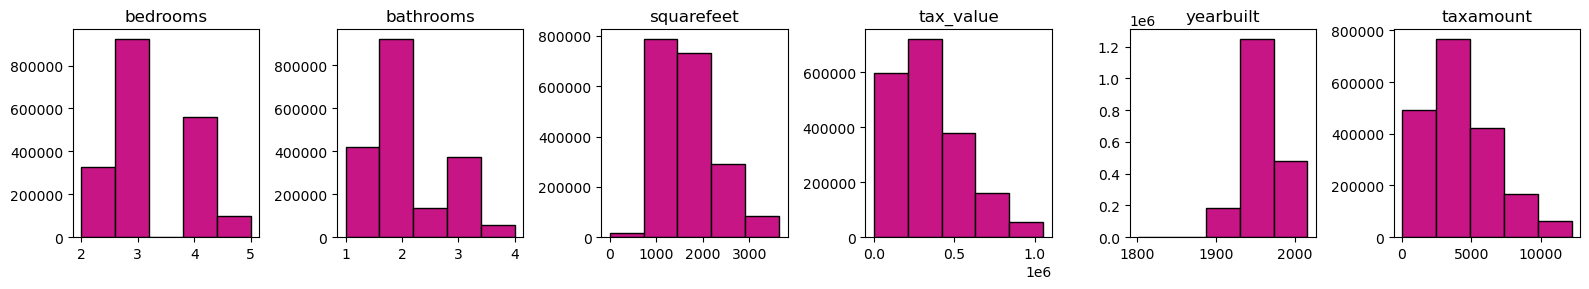

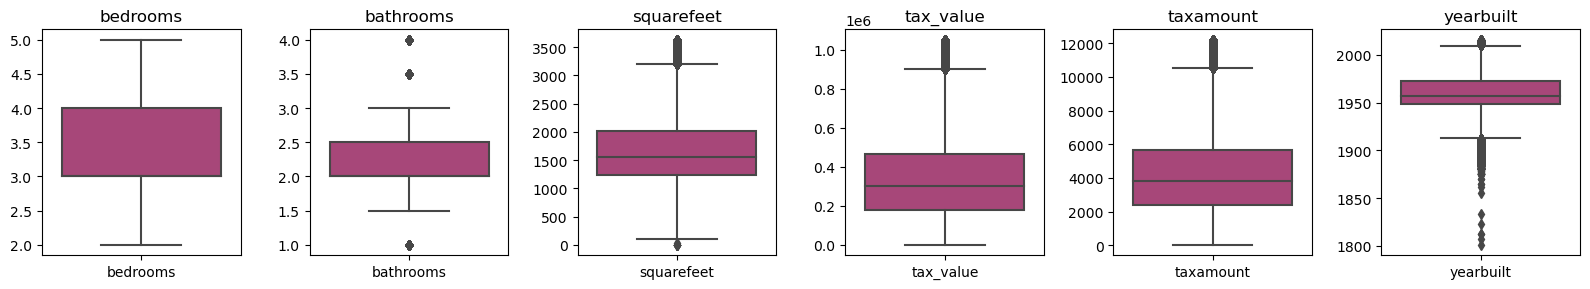

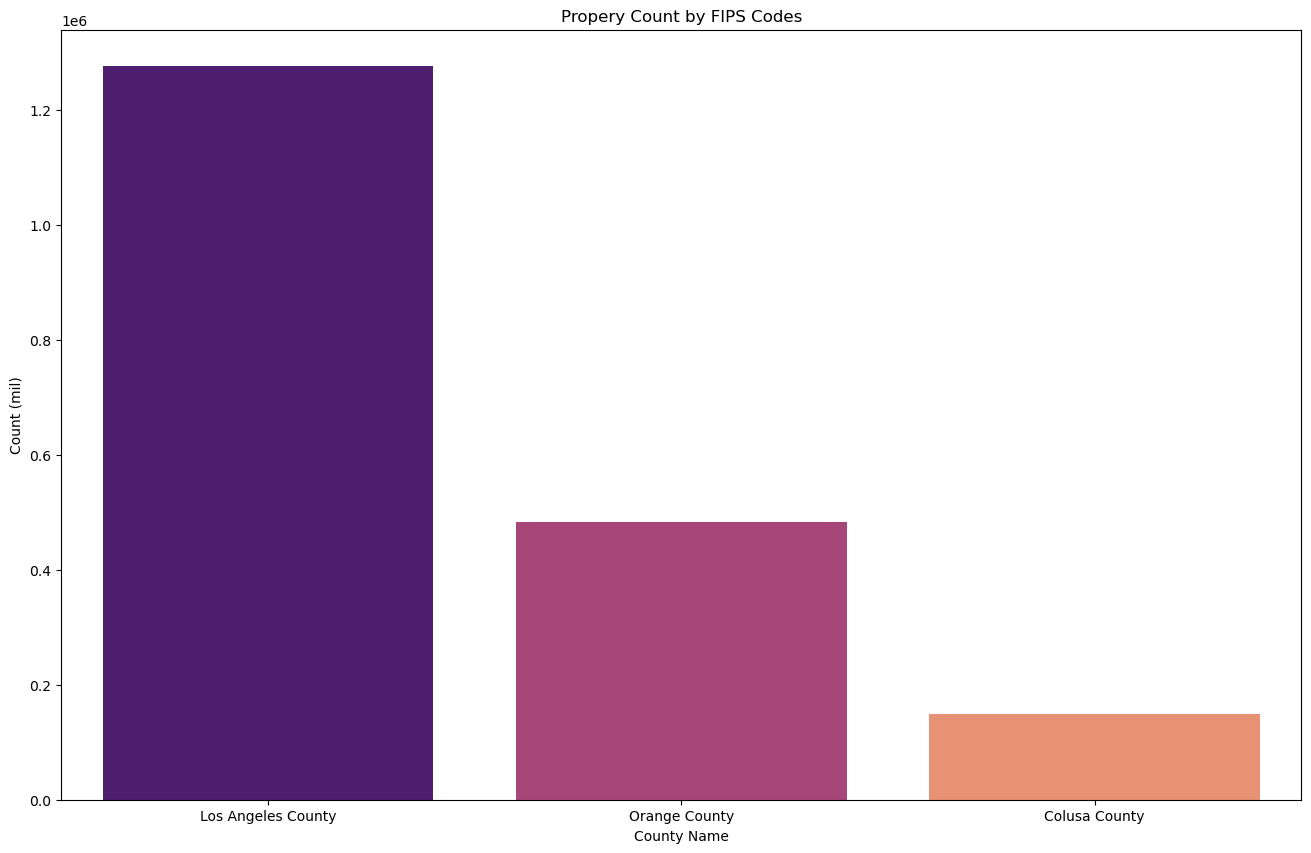

In [3]:
train, val, test = wrangle.wrangle_zillow()

In [4]:
train.columns

Index(['bedrooms', 'bathrooms', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips', 'propertytypeid', 'fips_location'],
      dtype='object')

In [5]:
X = train.drop(columns={'fips', 'propertytypeid', 'fips_location', 'tax_value'})
y = train['tax_value']

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression().fit(X[['squarefeet']], y)

In [8]:
y_preds = lm.predict(X[['squarefeet']])

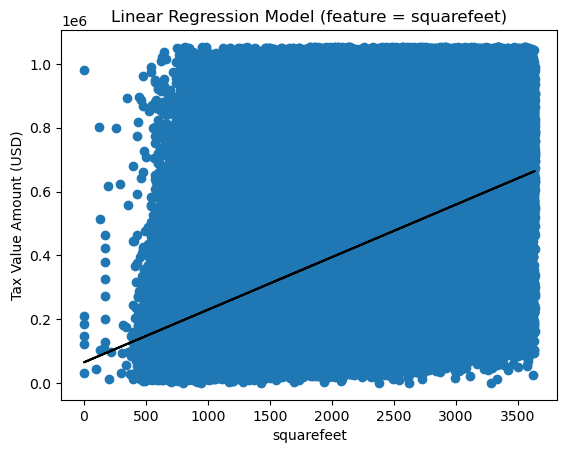

In [9]:
plt.scatter(X[['squarefeet']], y)

plt.plot(X[['squarefeet']], y_preds, color='black')
plt.title('Linear Regression Model (feature = squarefeet)')
plt.xlabel('squarefeet')
plt.ylabel('Tax Value Amount (USD)')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [10]:
baseline = y.mean()
baseline

341792.9642645853

In [11]:
X['baseline'] = baseline

In [12]:
X.head()

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount,baseline
1162651,3.0,2.0,1537.0,2008.0,3410.01,341792.964265
782265,3.0,3.0,1780.0,1958.0,6415.11,341792.964265
405503,4.0,2.0,1839.0,1981.0,4575.06,341792.964265
1028626,4.0,2.0,1756.0,1950.0,6721.89,341792.964265
1802146,3.0,2.0,1212.0,1958.0,3610.64,341792.964265


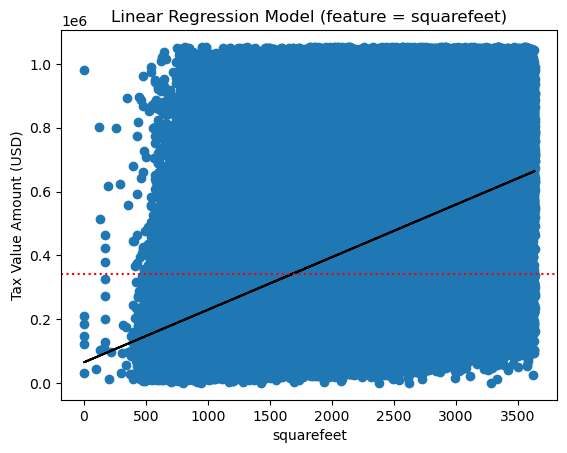

In [13]:
plt.scatter(X[['squarefeet']], y)

plt.plot(X[['squarefeet']], y_preds, color='black')
plt.title('Linear Regression Model (feature = squarefeet)')
plt.xlabel('squarefeet')
plt.ylabel('Tax Value Amount (USD)')
plt.axhline(baseline, ls=':', color='red')
plt.show()

In [14]:
X['yhat'] = y_preds

Calculate the residuals for both baseline (actual mean) and yhat (prediction).

In [15]:
X['baseline_residual'] = y - X.baseline
X['lm_residual'] = y - X.yhat

In [16]:
X

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount,baseline,yhat,baseline_residual,lm_residual
1162651,3.0,2.0,1537.0,2008.0,3410.01,341792.964265,318033.138999,-139792.964265,-116033.138999
782265,3.0,3.0,1780.0,1958.0,6415.11,341792.964265,358126.188084,191233.035735,174899.811916
405503,4.0,2.0,1839.0,1981.0,4575.06,341792.964265,367860.714405,17182.035735,-8885.714405
1028626,4.0,2.0,1756.0,1950.0,6721.89,341792.964265,354166.380767,201365.035735,188991.619233
1802146,3.0,2.0,1212.0,1958.0,3610.64,341792.964265,264410.748248,-10727.964265,66654.251752
...,...,...,...,...,...,...,...,...,...
121192,4.0,2.0,1325.0,1948.0,3689.27,341792.964265,283054.841032,-83148.964265,-24410.841032
1625371,4.0,2.5,2419.0,2000.0,10197.90,341792.964265,463556.057900,393435.035735,271671.942100
952015,3.0,2.0,1682.0,1965.0,8946.87,341792.964265,341956.974873,426940.035735,426776.025127
1726184,4.0,3.0,1140.0,1957.0,3091.76,341792.964265,252531.326297,-94360.964265,-5099.326297


### SSE (Sum of Squared Errors)

Compute the SSE, Sum of Squared Errors, a.k.a. RSS, Residual Sum of Squares. This is simply squaring each of the errors computed in step one and summing them all together.

In [19]:
from sklearn.metrics import mean_squared_error


SSE_lm = mean_squared_error(y, X.yhat)*len(train)
SSE_lm

3.944518287154014e+16

### ESS (Explained Sum of Squares)

In [21]:
ESS_lm = sum((X.yhat - X.baseline) ** 2)
ESS_lm

1.0222775859157188e+16

### TSS (Total Sum of Squares)

In [23]:
TSS_lm = ESS_lm + SSE_lm
TSS_lm

4.966795873069733e+16

### MSE (Mean Squared Error)

In [24]:
MSE_lm = mean_squared_error(y, X.yhat)
MSE_lm

36924426147.31523

### RMSE (Root Mean Squared Error)

In [60]:
RMSE_lm = sqrt(MSE_lm)
RMSE_lm

192157.2953268109

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [29]:
SSE_baseline = mean_squared_error(y, X.baseline)*len(train)
SSE_baseline

4.966795873070233e+16

In [30]:
MSE_baseline = mean_squared_error(y, X.baseline)
MSE_baseline

46493912324.15679

In [31]:
RMSE_baseline = sqrt(MSE_baseline)
RMSE_baseline

215624.4706060905

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [34]:
def compare_SSE(SSE_baseline, SSE_model):
    if SSE_baseline > SSE_model:
        print(f'The SSE for the baseline is {SSE_baseline}. The SSE for the model is {SSE_model}. \n\nThe SSE for the baseline is greater than that of the model. \n\nThe model seems to perform better than the baseline.')
    if SSE_baseline < SSE_model:
        print(f'The SSE for the baseline is {SSE_baseline}. The SSE for the model is {SSE_model}. \n\nThe SSE for the baseline is less than that of the model. \n\nThe baseline model seems to perform better than the linear regression model.')

In [35]:
compare_SSE(SSE_baseline, SSE_lm)

The SSE for the baseline is 4.966795873070233e+16. The SSE for the model is 3.944518287154014e+16. 

The SSE for the baseline is greater than that of the model. 

The model seems to perform better than the baseline.


7. What is the amount of variance explained in your model?

In [38]:
evs = explained_variance_score(y, X.yhat)
print(f'The explained variance is {evs}.')

The explained variance is 0.20582234745320738.


In [64]:
r2_score(y, X.yhat)

0.2058223474532075

8. Is your model better than the baseline model?

In [43]:
eval_df = pd.DataFrame(
    {
    'Model': [SSE_lm, MSE_lm, RMSE_lm],
    'Baseline': [SSE_baseline, MSE_baseline, RMSE_baseline],   
    }, index = ['SSE', 'MSE', 'RMSE']
)

eval_df

,Model,Baseline
SSE,3.944518e+16,4.966796e+16
MSE,3.692443e+10,4.649391e+10
RMSE,1.921573e+05,2.156245e+05


9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot

In [72]:

def plot_residuals(y, yhat):

# plt.scatter(X['baseline'], X['baseline_residual'], color='turquoise')

# plt.title('Baseline Model Residual')
# plt.xlabel('squarefeet')
# plt.ylabel('Residual')
# plt.axhline(baseline, ls=':', color='red')
# plt.show()

    plt.scatter(yhat, (y - yhat), color='purple')

    plt.title('Linear Regression Model Residual')
    plt.xlabel('Predictions')
    plt.ylabel('Residual')
    plt.show()

In [44]:
X.head()

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount,baseline,yhat,baseline_residual,lm_residual
1162651,3.0,2.0,1537.0,2008.0,3410.01,341792.964265,318033.138999,-139792.964265,-116033.138999
782265,3.0,3.0,1780.0,1958.0,6415.11,341792.964265,358126.188084,191233.035735,174899.811916
405503,4.0,2.0,1839.0,1981.0,4575.06,341792.964265,367860.714405,17182.035735,-8885.714405
1028626,4.0,2.0,1756.0,1950.0,6721.89,341792.964265,354166.380767,201365.035735,188991.619233
1802146,3.0,2.0,1212.0,1958.0,3610.64,341792.964265,264410.748248,-10727.964265,66654.251752


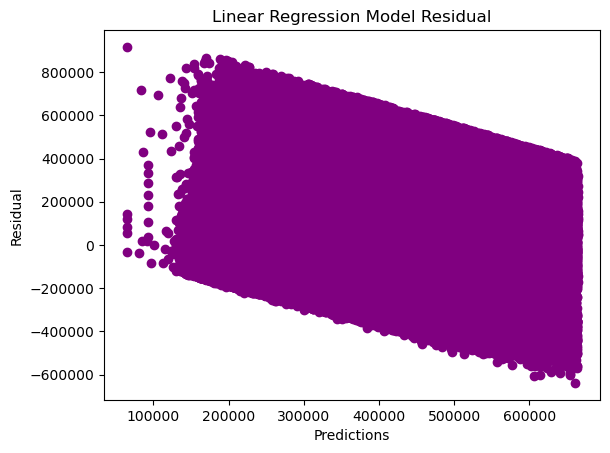

In [73]:
plot_residuals(y, X.yhat)

- regression_errors(y, yhat): returns the following values:


    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [79]:
def regression_errors(y, yhat):

    SSE = mean_squared_error(y, yhat)*len(y)
    ESS = sum((yhat - y.mean()) ** 2)
    TSS = SSE + ESS
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(MSE)

    regression_errors_df = pd.DataFrame(
    {
        'model_metrics': [SSE, ESS, TSS, MSE, RMSE]
        }, index = ['SSE', 'ESS', 'TSS', 'MSE', 'RMSE']
    )
    
    return regression_errors_df

In [80]:
regression_errors(y, X['yhat'])

,model_metrics
SSE,3.944518e+16
ESS,1.022278e+16
TSS,4.966796e+16
MSE,3.692443e+10
RMSE,1.921573e+05


- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [97]:
def baseline_mean_errors(y):
    baseline = [[y.mean()]] * len(y)
    
    SSE_baseline = mean_squared_error(y, baseline)*len(y)
    MSE_baseline = mean_squared_error(y, baseline)
    RMSE_baseline = sqrt(MSE_baseline)
    
    baseline_errors_df = pd.DataFrame(
    {
        'baseline_metrics': [SSE_baseline, MSE_baseline, RMSE_baseline]
        }, index = ['SSE', 'MSE', 'RMSE']
    )
    
    return baseline_errors_df

In [98]:
baseline_mean_errors(y)

,baseline_metrics
SSE,4.966796e+16
MSE,4.649391e+10
RMSE,2.156245e+05


- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [110]:
def better_than_baseline(y, yhat):  
    
    SSE = mean_squared_error(y, yhat)*len(y)
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(MSE)
    
    baseline = [[y.mean()]] * len(y)
    
    SSE_baseline = mean_squared_error(y, baseline)*len(y)
    MSE_baseline = mean_squared_error(y, baseline)
    RMSE_baseline = sqrt(MSE_baseline)
    
    model_comparison_df = pd.DataFrame(
        {
        'baseline_metrics': [SSE_baseline, MSE_baseline, RMSE_baseline],
        'model_metrics': [SSE, MSE, RMSE]
        }, index = ['SSE', 'MSE', 'RMSE']
    )
    
    if SSE < SSE_baseline:
        print(f'The model SSE is less than the baseline SSE. This indicates that the model performs better than the baseline.\n\n')
    else:
        print(f'The baseline SSE is less than or equal to the model SSE. This indicates that the baseline performs better than the model.\n\n')
        
    if MSE < MSE_baseline:
        print(f'The model MSE is less than the baseline MSE. This indicates that the model performs better than the baseline.\n\n')
    else:
        print(f'The baseline MSE is less than or equal to the model MSE. This indicates that the baseline performs better than the model.\n\n')
        
    if RMSE < RMSE_baseline:
        print(f'The model RMSE is less than the baseline RMSE. This indicates that the model performs better than the baseline.\n\n')
    else:
        print(f'The baseline RMSE is less than or equal to the model RMSE. This indicates that the baseline performs better than the model.\n\n')
        
    print(f'\nIs the model better than the baseline?\n')
    if SSE < SSE_baseline and MSE < MSE_baseline and RMSE < RMSE_baseline:
        print('True')
    else:
        print('False')
    
    return model_comparison_df

In [111]:
better_than_baseline(y, X['yhat'])

The model SSE is less than the baseline SSE. This indicates that the model performs better than the baseline.


The model MSE is less than the baseline MSE. This indicates that the model performs better than the baseline.


The model RMSE is less than the baseline RMSE. This indicates that the model performs better than the baseline.



Is the model better than the baseline?

True


,baseline_metrics,model_metrics
SSE,4.966796e+16,3.944518e+16
MSE,4.649391e+10,3.692443e+10
RMSE,2.156245e+05,1.921573e+05
